In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 11
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((516, 12, 1), (516,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT11/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2587 - root_mean_squared_error: 0.5086

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 6s 76ms/step - loss: 0.2531 - root_mean_squared_error: 0.5030 - val_loss: 0.2055 - val_root_mean_squared_error: 0.4533
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1697 - root_mean_squared_error: 0.4120

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1685 - root_mean_squared_error: 0.4105 - val_loss: 0.1749 - val_root_mean_squared_error: 0.4182
Epoch 3/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1355 - root_mean_squared_error: 0.3681

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.1309 - root_mean_squared_error: 0.3618 - val_loss: 0.1449 - val_root_mean_squared_error: 0.3807
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1043 - root_mean_squared_error: 0.3230

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.1008 - root_mean_squared_error: 0.3175 - val_loss: 0.1179 - val_root_mean_squared_error: 0.3433
Epoch 5/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0824 - root_mean_squared_error: 0.2870

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843 - val_loss: 0.0973 - val_root_mean_squared_error: 0.3120
Epoch 6/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0593 - root_mean_squared_error: 0.2435

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0579 - root_mean_squared_error: 0.2405 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2775
Epoch 7/50
52/53 [============================>.] - ETA: 0s - loss: 0.0454 - root_mean_squared_error: 0.2130

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0459 - root_mean_squared_error: 0.2143 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2530
Epoch 8/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0318 - root_mean_squared_error: 0.1783

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0318 - root_mean_squared_error: 0.1783 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0232 - root_mean_squared_error: 0.1524

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1952
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1539

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0237 - root_mean_squared_error: 0.1539 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0161 - root_mean_squared_error: 0.1270

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1438
Epoch 12/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1207

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0160 - root_mean_squared_error: 0.1263 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1310
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0135 - root_mean_squared_error: 0.1160 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1090

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0113 - root_mean_squared_error: 0.1065 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0808
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1154

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 16/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1148

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0801
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 19/50
53/53 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1019

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 20/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1099

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0092 - root_mean_squared_error: 0.0960 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1253
Epoch 23/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.0942

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0092 - root_mean_squared_error: 0.0959 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 26/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1039

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 27/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0965
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0732
Epoch 29/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0755
Epoch 30/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0773
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0140 - root_mean_squared_error: 0.1183 - val_loss: 0.0049 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 38/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 39/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0788
Epoch 40/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1045 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 41/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0107 - root_mean_squared_error: 0.1032 - val_loss: 0.0051 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


INFO:tensorflow:Assets written to: Pacific_model_LT11\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0087 - root_mean_squared_error: 0.0932 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0674
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 45/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 46/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0113 - root_mean_squared_error: 0.1065 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 47/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0103 - root_mean_squared_error: 0.1015 - val_loss: 0.0080 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.4477829178174337 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

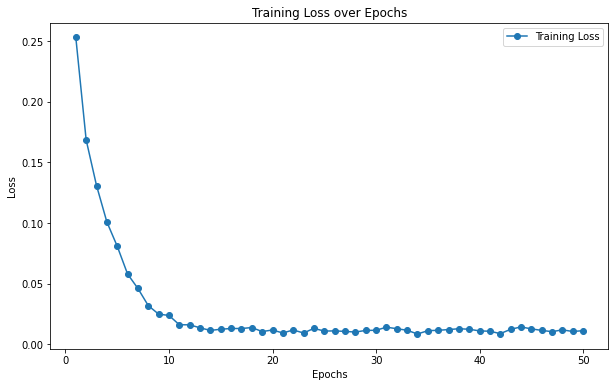

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

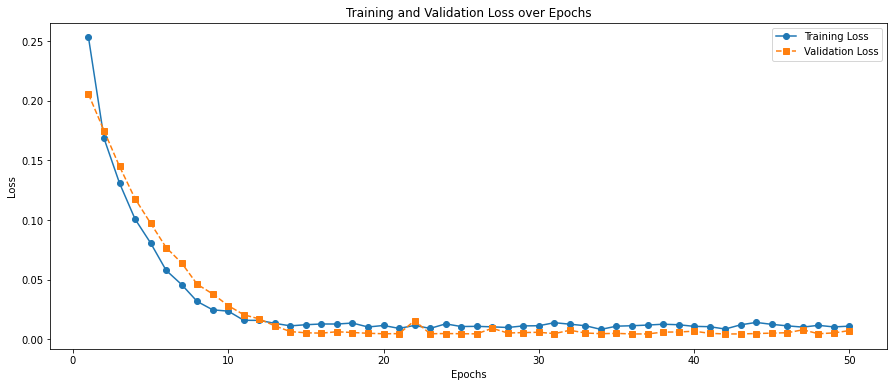

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT11/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.062023249354507766
MAE : 0.04954933906687931


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,4.035205e+05,610848.036
1,7.629936e+05,819257.445
2,1.058095e+06,1129627.707
3,1.452349e+06,1463383.236
4,1.650791e+06,1614536.727
5,1.904019e+06,1862498.612
6,1.976424e+06,2099349.296
7,1.848804e+06,1981614.046
8,1.122084e+06,1433022.369
9,8.375434e+05,826739.716


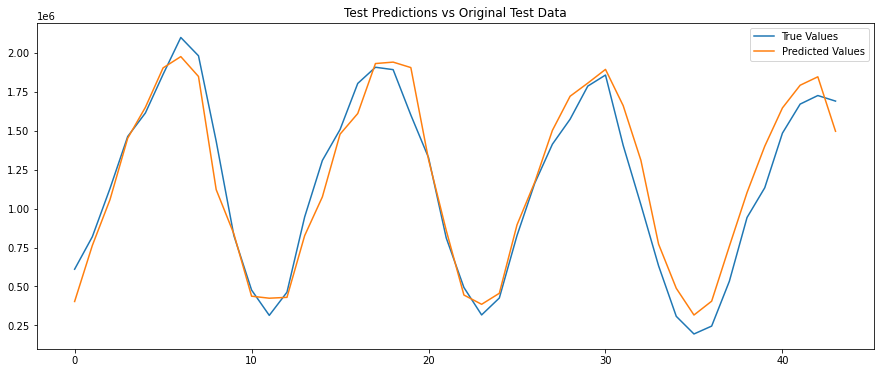

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

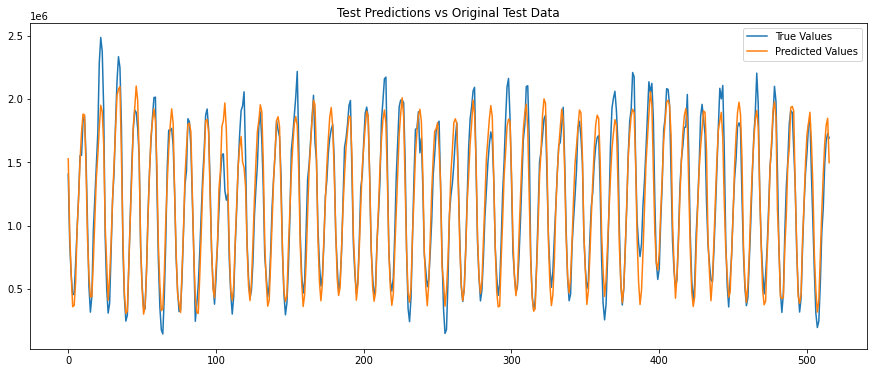

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()